In [59]:
#1. import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [60]:
#2. Import the model you want to use
ttsv= pd.read_csv("train.csv" , sep = ',')

In [61]:
#3. Display first few records
ttsv.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [62]:
#4. check column names
ttsv.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [63]:
#5. do label encoding
from sklearn import preprocessing

In [64]:
#6. encode categorical features. IT IS NOT A RECOMMENDED APPROACH
ttsv_e = ttsv.apply(preprocessing.LabelEncoder().fit_transform)

In [65]:
#7. do some exploratory data analysis
ttsv_e.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,28,1,0,523,18,147,2
1,1,1,0,190,0,51,1,0,596,207,81,0
2,2,1,2,353,0,34,0,0,669,41,147,2
3,3,1,0,272,0,47,1,0,49,189,55,2
4,4,0,2,15,1,47,0,0,472,43,147,2


Text(0, 0.5, 'Age')

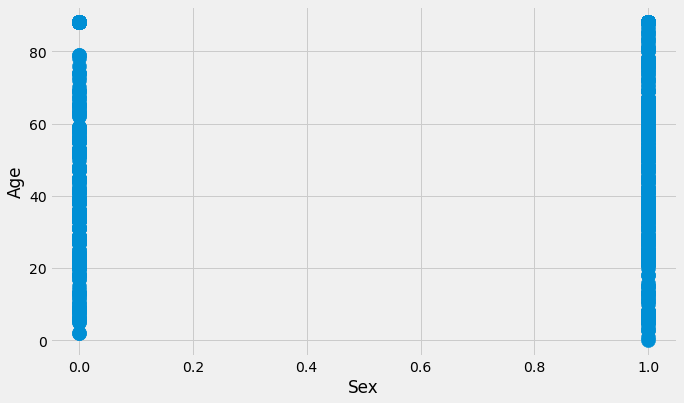

In [66]:
#Plot duration vs deposit
plt.scatter(ttsv_e.Sex, ttsv_e.Age,s=200)
plt.xlabel('Sex')
plt.ylabel('Age')

In [67]:
#8. Build logistic regression model
from sklearn.linear_model import LogisticRegression

In [68]:
#9. Build logistic regression model
model_logistic = LogisticRegression()

In [69]:
#10. Find generalization error. Use 80/20 split
from sklearn.model_selection import train_test_split

In [70]:
#11. dividing the dataset into train and test.
x_train, x_test, y_train, y_test = train_test_split(ttsv_e.iloc[:,:12],ttsv_e.iloc[:,2],test_size=0.2,random_state=42)


In [71]:
type(train_test_split(ttsv_e.iloc[:,:12],ttsv_e.iloc[:,2],test_size=0.2,random_state=42))

list

In [72]:
ttsv_e.shape, x_train.shape, y_train.shape, x_test.shape, y_test.shape

((891, 12), (712, 12), (712,), (179, 12), (179,))

In [73]:
#12. fitting Logistic Regression (Training Part)
model_logistic.fit(x_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
#13 Make predictions on entire test data
predictions = model_logistic.predict(x_test)

In [75]:
# Accuracy measures how correct our predictions were. 
score = model_logistic.score(x_test, y_test)
print (score)

0.8212290502793296


In [76]:
# Calculating AUC for the model
from sklearn import model_selection
scoring = 'roc_auc'
results = model_selection.cross_val_score(model_logistic ,ttsv_e.iloc[:,:12],ttsv_e.iloc[:,2], scoring=scoring)
print(("AUC: %.3f (%.3f)") % (results.mean(), results.std()))

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, i

AUC: nan (nan)


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, i

In [77]:
# Calculating Confusion matrix for the model
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
print(matrix)

[[41 11  1]
 [ 0 20 13]
 [ 1  6 86]]
